In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1.Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [28]:
df=pd.read_csv('Batting.csv')
df.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


2)Print out the dimensions and info about the dataframe you just created

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

3)How many players have hit 40 or more HRs in one single season? (Number only)

In [30]:
df_gby = df.groupby(['yearID','playerID']).sum()
df_rst = df_gby[df_gby['HR']>=40].reset_index()
df_rst['playerID'].nunique()

142

4)How many players have hit more than 600 HRs for their career? (Dataframe)

In [57]:
df1=df.groupby('playerID')
df2=df1.sum()
pd.DataFrame(df2[df2['HR']>600]['HR']).reset_index()

,playerID,HR
0,aaronha01,755
1,bondsba01,762
2,griffke02,630
3,mayswi01,660
4,rodrial01,696
5,ruthba01,714
6,sosasa01,609
7,thomeji01,612


5)How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [32]:
df_gby = df.groupby(['yearID','playerID']).sum()
df_rst = df_gby[(df_gby['2B']>=40) & (df_gby['3B']>=10) & (df_gby['H']>=200) & (df_gby['HR']>=30)].reset_index()
df_rst['playerID'].nunique()

11

6)How many players have had 100 or more SBs in a season? (Dataframe)

In [33]:
df_gby = df.groupby(['yearID','playerID']).sum()
df_rst = df_gby[(df_gby['SB']>=100)].reset_index()
pd.DataFrame(df_rst['playerID'].unique(),columns=['player'])

,player
0,brownpe01
1,comisch01
2,fogarji01
3,lathaar01
4,nicolhu01
5,wardjo01
6,hamilbi01
7,brownto01
8,willsma01
9,brocklo01


7)How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [34]:
df_1960s = df[(df['yearID'] >= 1960) & (df['yearID'] <=1969)]
by_player1960s = df_1960s.groupby('playerID').sum()
pd.DataFrame(by_player1960s[by_player1960s['HR']>200][['HR']]).reset_index()

,playerID,HR
0,aaronha01,375
1,allisbo01,225
2,bankser01,269
3,cashno01,278
4,cepedor01,254
5,colavro01,245
6,howarfr01,288
7,kalinal01,210
8,killeha01,393
9,mantlmi01,256


8)Who has hit the most HRs in history? (Dataframe)

In [35]:
by_player=df.groupby('playerID').sum().sort_values('HR',ascending=0)
pd.DataFrame(by_player['HR']).head(1)

,HR
playerID,
bondsba01,762


9)Who had the most hits in the 1970s? (Dataframe)

In [36]:
df_1970s = df[(df['yearID'] >= 1970) & (df['yearID'] <=1979)]
by_player1970s=df_1970s.groupby('playerID').sum().sort_values('H',ascending=0)
pd.DataFrame(by_player1970s['H']).head(1)

,H
playerID,
rosepe01,2045


10)Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)     
OBP(onbase percentage)=(H+BB+IBB+SH+SF)/AB     
PA(Plate Appearances)=AB+BB+IBB+SH+SF

In [37]:
df_1977 = df[df['yearID'] == 1977]
df_gby = df_1977.groupby('playerID').sum()
df_gby['PA']=df_gby['AB']+df_gby['BB']+df_gby['IBB']+df_gby['SH']+df_gby['SF']
df_gby['OBP']=(df_gby['H']+df_gby['BB']+df_gby['IBB']+df_gby['SH']+df_gby['SF'])/df_gby['AB']
df_PA = df_gby[df_gby['PA']>=500][['OBP','PA','yearID']]
df_PA.sort_values('OBP',ascending=0).head(5)

,OBP,PA,yearID
playerID,,,
singlke01,0.563433,662.0,1977
smithre06,0.559426,611.0,1977
tenacge01,0.556064,578.0,1977
hargrmi01,0.540952,649.0,1977
carewro01,0.534091,706.0,1977


11)Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)    
Average=H/AB

In [38]:
df_2013 = df[df['yearID'] == 2013]
df_gby = df_2013.groupby('playerID').sum()
df_gby['Average']=df_gby['H']/df_gby['AB']
df_gby['PA']=df_gby['AB']+df_gby['BB']+df_gby['IBB']+df_gby['SH']+df_gby['SF']
df_gby[df_gby['PA']>=300][['Average','PA','yearID']].sort_values('Average',ascending=0).head(8)

,Average,PA,yearID
playerID,,,
cabremi01,0.347748,666.0,2013
ramirha01,0.345395,336.0,2013
cuddymi01,0.331288,543.0,2013
mauerjo01,0.323596,515.0,2013
troutmi01,0.322581,717.0,2013
johnsch05,0.321012,550.0,2013
freemfr01,0.319419,632.0,2013
puigya01,0.319372,427.0,2013


12)Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [40]:
df_filter = df[['playerID','yearID','H']]
df_leaders = pd.DataFrame([],columns=['playerID','yearID','H'])

for i in range(1940,1950):
    df_year = df_filter[df_filter['yearID'] == i]
    df_by_player = df_year.groupby('playerID').sum()
    df_rst = df_by_player.reset_index()   
    df_max = df_rst[df_rst['H'] == df_rst['H'].max()]
    frames = [df_max,df_leaders]
    df_leaders = pd.concat(frames)  
df_leaders

,playerID,yearID,H
328,musiast01,1949,207
337,musiast01,1948,230
373,peskyjo01,1947,207
413,musiast01,1946,228
229,holmeto01,1945,224
469,stirnsn01,1944,205
337,musiast01,1943,220
364,peskyjo01,1942,205
489,travice01,1941,218
84,cramedo01,1940,200


13)Who led MLB(entire dataset) with the most hits the most times?  And how many times?  (Dataframe, Number)

In [41]:
df_filter = df[['playerID','yearID','H']]
df_leaders = pd.DataFrame([],columns=['playerID','yearID','H'])
v_max = df_filter['yearID'].max()
v_min = df_filter['yearID'].min()

for i in range(v_min,v_max+1):
    df_year = df_filter[df_filter['yearID'] == i]
    df_by_player = df_year.groupby('playerID').sum()
    df_rst = df_by_player.reset_index()
    df_max = df_rst[df_rst['H'] == df_rst['H'].max()]
    frames = [df_max,df_leaders]
    df_leaders = pd.concat(frames)  
df_leaders['playerID'].count()
arr_count = df_leaders.groupby('playerID')['yearID'].nunique()
df_count = pd.DataFrame(arr_count)
print(df_count['yearID'].max())
df_count[df_count['yearID']==df_count['yearID'].max()].rename(columns={"yearID": "count"})


7


,count
playerID,
cobbty01,7
rosepe01,7
suzukic01,7


14)Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [58]:
by_games=df.groupby('playerID').sum()
df_games=pd.DataFrame(by_games['G'])
df_games.sort_values('G',ascending=0).head()

,G
playerID,
rosepe01,3562
yastrca01,3308
aaronha01,3298
henderi01,3081
cobbty01,3035


15)How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  
Just a number is okay here

In [43]:
by_playerH = df.groupby('playerID').sum()
by_playerH[(by_playerH['H']>3000) & (by_playerH['HR']>=500)].shape[0]

5

16)How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [44]:
df_1988 = df[df['yearID']==1988]
df_1988['HR'].sum()

3180

17)Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which 
he had at least 500 ABs.  I would like a dataframe sorted by average.

In [45]:
df_WadeBoggs = df[(df['nameFirst'].str.lower()=='wade') & (df['nameLast'].str.lower()=='boggs')]
by_WadeBoggs = df_WadeBoggs.groupby('yearID').sum()
by_WadeBoggsAB = by_WadeBoggs[by_WadeBoggs['AB']>=500]
#by_WadeBoggsAB
by_WadeBoggsAB['Season_avg']=by_WadeBoggsAB['H']/by_WadeBoggsAB['AB']
by_WadeBoggsAB[['AB','Season_avg']].sort_values('Season_avg',ascending=0).head(3)

C:\Users\manoj\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,AB,Season_avg
yearID,,
1985,653,0.367534
1988,584,0.366438
1987,551,0.362976


18)Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  
I would like a dataframe for this

In [46]:
df_1977 = df[df['yearID'] == 1995]
df_gby = df_1977.groupby('playerID').sum()
df_gby['PA']=df_gby['AB']+df_gby['BB']+df_gby['IBB']+df_gby['SH']+df_gby['SF']
df_gby['OBP']=(df_gby['H']+df_gby['BB']+df_gby['IBB']+df_gby['SH']+df_gby['SF'])/df_gby['AB']
df_PA = df_gby[df_gby['PA']>=400][['OBP','PA','yearID']]
df_PA.sort_values('OBP',ascending=0).head(10)

,OBP,PA,yearID
playerID,,,
thomafr04,0.667343,670.0,1995
martied01,0.628180,650.0,1995
mcgwima01,0.586751,416.0,1995
bondsba01,0.583004,652.0,1995
davisch01,0.577830,534.0,1995
magadda01,0.551724,431.0,1995
thomeji01,0.542035,555.0,1995
baineha01,0.524675,472.0,1995
weisswa01,0.524590,540.0,1995


19)Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [47]:
df_myears = df[(df['yearID']==1922) | (df['yearID']==1925) | (df['yearID']==1926) | (df['yearID']==1928)]
df_by_yp = df_myears.groupby('playerID').sum()['3B']
df_rstind = df_by_yp.reset_index()
df_leader = df_rstind.iloc[df_rstind['3B'].idxmax()][['playerID','3B']]
pd.DataFrame([df_leader])

,playerID,3B
1011,walkecu01,59


20)How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [48]:
df1 = df.groupby(['yearID','playerID']).sum()
df2 = df1[(df1['HR']>=30) & (df1['SB']>=30)]
df2.reset_index()['playerID'].nunique()

38

21)Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [49]:
df_1986 = df[df['yearID']==1986].groupby('playerID').sum()
df_1986['PA']=df_1986['AB']+df_1986['BB']+df_1986['IBB']+df_1986['SH']+df_1986['SF']
df_sort = df_1986[df_1986['PA']>=400]
df_sort['OBP']=(df_sort['H']+df_sort['BB']+df_sort['IBB']+df_sort['SH']+df_sort['SF'])/df_sort['AB']
df_sort.sort_values('OBP',ascending=0)[['OBP','PA']].head(1)

C:\Users\manoj\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,OBP,PA
playerID,,
boggswa01,0.575862,707.0


22)Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [50]:
df_1997 = df[(df['yearID']==1997) & (df['lgID']=='NL')].groupby('playerID').sum()
df_1997['PA']=df_1997['AB']+df_1997['BB']+df_1997['IBB']+df_1997['SH']+df_1997['SF']
df_sort97 = df_1997[df_1997['PA']>=400]
df_sort97['OBP']=(df_sort97['H']+df_sort97['BB']+df_sort97['IBB']+df_sort97['SH']+df_sort97['SF'])/df_sort97['AB']
df_sort97.sort_values('OBP',ascending=0)[['OBP','PA']].head(1)

C:\Users\manoj\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,OBP,PA
playerID,,
bondsba01,0.637218,716.0


23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [51]:
df_2012 = df[df['yearID']==2012]
arr_lg = df_2012['lgID'].unique()
df_players = pd.DataFrame([],columns=['playerID','PA','HR','League'])

for i in arr_lg:
    df_2012_lg = df_2012[df_2012['lgID'] == i]
    v_mean = df_2012_lg['HR'].mean()
    print("league average HR for",i,' = ',v_mean)
    df_by_player = df_2012_lg.groupby('playerID').sum()
    df_by_player['PA']=df_by_player['AB']+df_by_player['BB']+df_by_player['IBB']+df_by_player['SH']+df_by_player['SF']
    df_2012_rst = df_by_player[(df_by_player['PA']>=500) & (df_by_player['HR']>v_mean)].reset_index()[['playerID','PA','HR']]
    df_2012_rst['League']=i
    frames = [df_2012_rst,df_players]
    df_players = pd.concat(frames)

df_players

league average HR for AL  =  3.8226299694189603
league average HR for NL  =  3.2281167108753315


,playerID,PA,HR,League
0,alonsyo01,625.0,9,NL
1,altuvjo01,624.0,7,NL
2,alvarpe01,591.0,30,NL
3,aokino01,576.0,10,NL
4,barneda01,586.0,7,NL
5,beltrca01,632.0,32,NL
6,bournmi01,701.0,9,NL
7,braunry02,681.0,41,NL
8,bruceja01,640.0,34,NL
9,cabreme01,505.0,11,NL


24)Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [52]:
df_gby = df.groupby(['yearID','playerID']).sum()
df_rst = df_gby[(df_gby['HR']>=50)].reset_index()
df_rst['age']=df_rst['yearID']-df_rst['birthYear']
df_rst[df_rst['age']>0][['yearID','playerID','birthYear','age']].sort_values('age',ascending=1).head(1)

,yearID,playerID,birthYear,age
39,2007,fieldpr01,1984,23


25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [54]:
df_sub = df[['playerID','yearID','birthYear','HR']]
df_gby = df_sub.groupby('playerID').sum()
arr_player = df_gby[df_gby['HR']>=300].reset_index()['playerID'].unique()
df_young = pd.DataFrame([],columns=[['playerID','yearID','birthYear','HR','cum_HR','age']])

for i in arr_player:
    df_player = df_sub[df_sub['playerID'] == i]
    df_player['cum_HR'] = df_player['HR'].cumsum()
    df_player['age']=df_player['yearID']-df_player['birthYear']
    df_top = df_player[df_player['cum_HR']>=300].sort_values('age',ascending=1).head(1)
    frames = [df_top,df_young]
    df_young = pd.concat(frames)
    
df_young.sort_values('age',ascending=1).head(5)[['playerID','cum_HR','age']]

C:\Users\manoj\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\manoj\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,playerID,cum_HR,age
27433,ottme01,306,28
91084,pujolal01,319,28
84326,rodrial01,345,28
86607,jonesan01,301,28
26174,foxxji01,302,28


BONUS:  Graph total HRs per season using bar graph

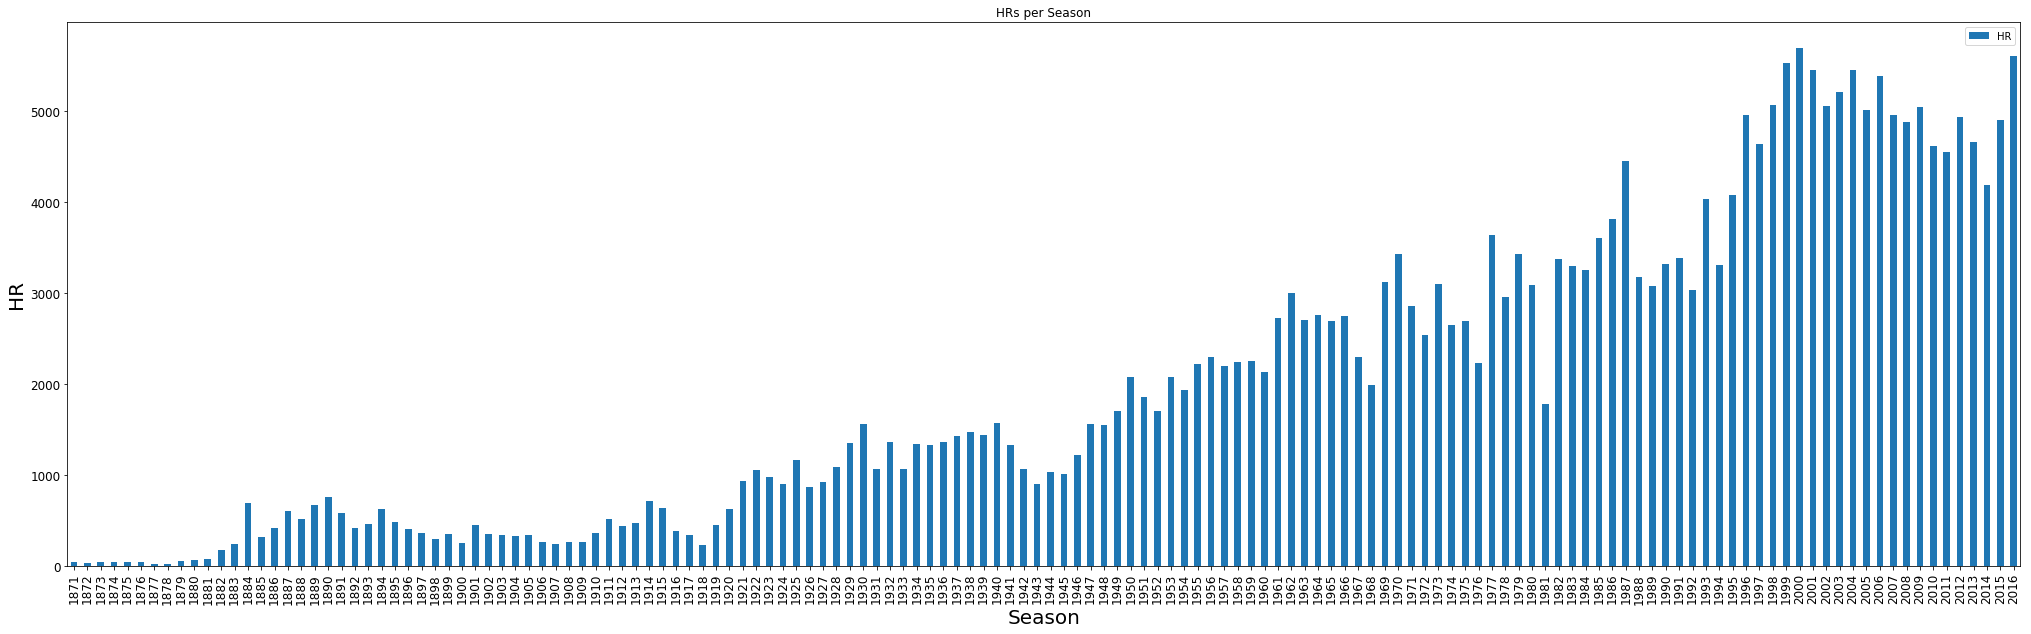

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df1 = df[['yearID','HR']].groupby(['yearID']).sum()
ax = df1.plot(kind='bar', title ="HRs per Season", figsize=(35, 10), legend=True, fontsize=12)
ax.set_xlabel("Season", fontsize=20)
ax.set_ylabel("HR", fontsize=20)
plt.show()

Using a line graph please graph the average HRs per AB (think about this) per season

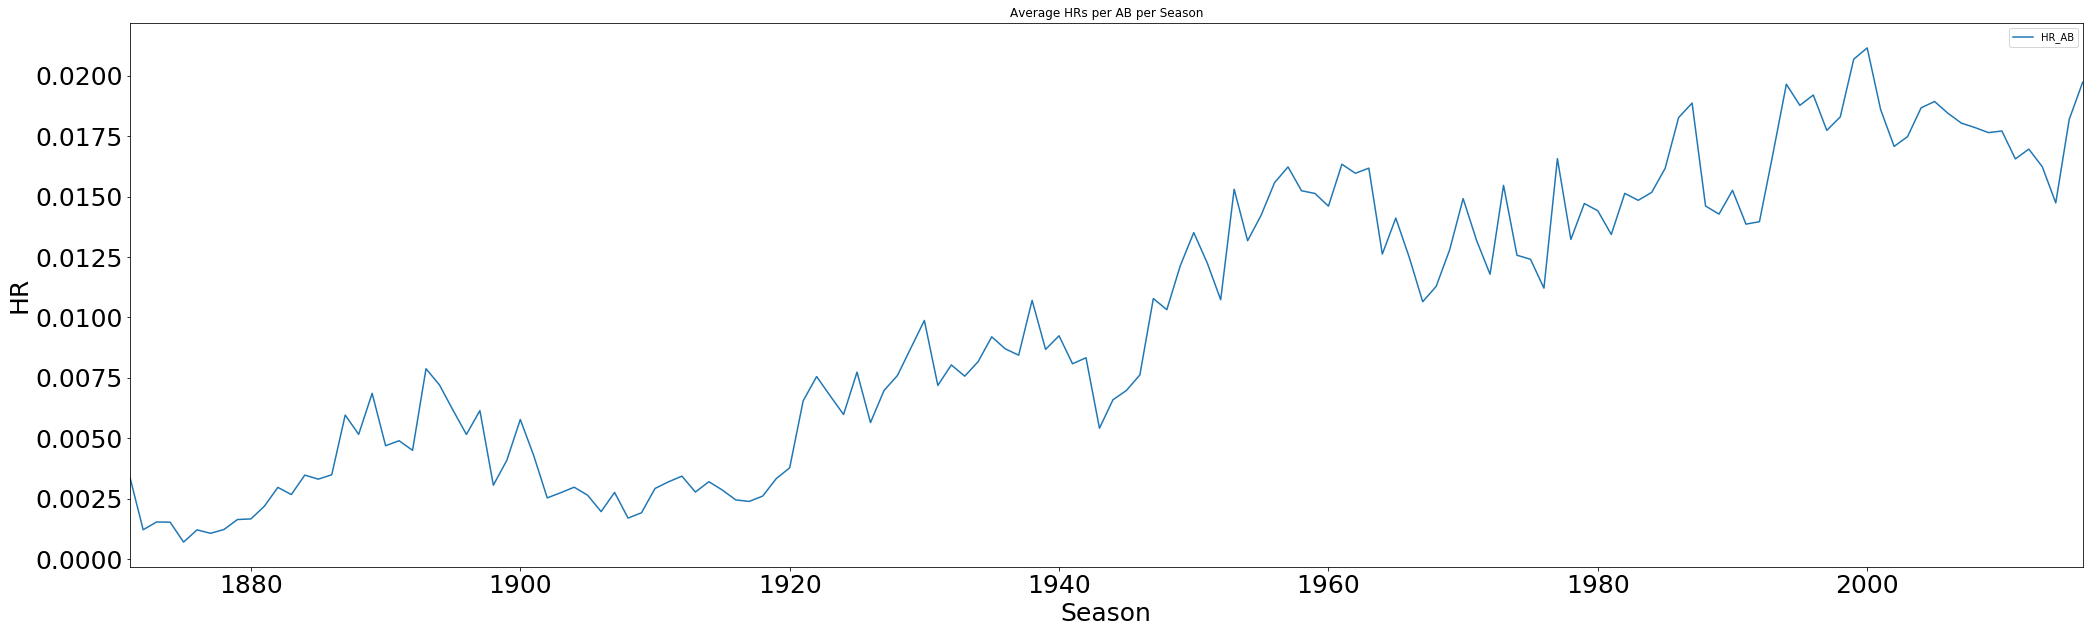

In [56]:
df_subset = df[['yearID','playerID','HR','AB']]
df_gby = df_subset.groupby(['yearID','playerID']).sum()
df_gby['HR_AB'] = df_gby['HR']/df_gby['AB']
df_avg = df_gby.reset_index().groupby('yearID').mean()

ax = df_avg['HR_AB'].plot(kind='line', title ="Average HRs per AB per Season", figsize=(35, 10), legend=True, fontsize=25)
ax.set_xlabel("Season", fontsize=25)
ax.set_ylabel("HR", fontsize=25)
plt.show()